
#   <span style='background :yellow' > ***Author: TANMAY SINHA*** </span>

# The Sparks Foundation

## Technical TASK 2 :- Prediction using Unsupervised ML. From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Use R or Python or perform this task.

## Dataset : https://bit.ly/3kXTdox

## Sample Solution : https://bit.ly/3cGyP8j


# <span style='background :Orange' > ***The Spark Foundation(Technical)Task-2:-Prediction using Unsupervised ML*** </span>

In this task,we will use the iris dataset,to predict the optimum number of cluster

#### Task Completed for The Sparks Foundation Internship Program
#### Data Science & Business Analytics Internship Task_2

## From the given iris dataset, predict the optimum number of clusters and represent it visually.

The iris dataset consists of 4 features sepal length, sepal width, petal length and petal width.
We will use k-means algorithm.
Finding the optimum number of clusters for k-means classification

## Importing Libraries

In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

## Loading Iris Data

In [6]:
iris = datasets.load_iris()   
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(20) # See the first 20 rows


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5               0.1
10                5.4               3.7                1.5               0.2
11                4.8               3.4                1.6               0.2
12                4.8               3.0                1.4               0.1
13                4.3               3.0                1.1               0.1
14                5.8               4.0                1.2               0.2
15                5.7               4.4                1.5               0.4
16                5.4               3.9                1.3               0.4
17                5.1               3.5                1.4               0.3
18                5.7               3.8                1.7               0.3
19                5.1               3.8                1.5               0.3

In [8]:
iris_df.shape

(150, 4)

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
iris_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

## Finding the optimum number of clusters for k-means classification


F:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


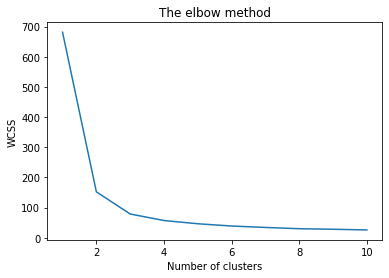

In [5]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

**From this we choose 3 clusters.**

In [6]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

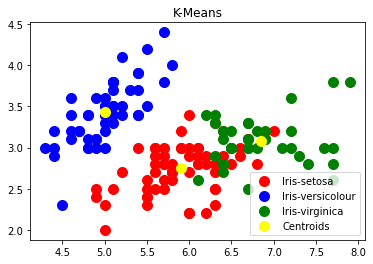

In [8]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title("K-Means")
plt.legend()
plt.show()

**This concludes the K-Means**